In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import pandas as pd
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_context('talk', font_scale=1)

In [10]:
# input_file = '../../resources/catalog_tsv_standard/estrs.tsv'
# input_label = 'trf'
# ref_length_cutoff = 100

In [11]:
input_file = snakemake.input[0]
input_label = snakemake.wildcards['catalog']

In [12]:
df = pd.read_csv(input_file, sep='\t')
len(df)

906

In [13]:
if len(df) > 50000:
    df = df.sample(50000, random_state=420)

In [14]:
df['motif_gc'] = df['motif'].str.replace('[AT]', '', regex=True)
df['gc_content'] = df['motif_gc'].str.len() / df['motif'].str.len()

In [17]:
# df.sample(5)

,chr,start,stop,motif,gene,gene.name,num.e,beta,tissue_info,pval,score,str.motif.reverse,motif_gc,gc_content
433,chr8,145172503,145172533,GTTTT,ENSG00000179698,KIAA1875,9,-0.522079,Adipose-Visceral_-0.24_0.01;Artery-Aorta_-0.38...,1.640230e-19,0.503221,AAAAC,G,0.200000
374,chr4,74723287,74723327,AC,ENSG00000109272,PF4V1,3,-0.320064,Cells-Transformedfibroblasts_-0.32_0.27;Lung_-...,5.538045e-09,0.540133,GT,C,0.500000
129,chr6,133574081,133574144,AC,ENSG00000112319,EYA4,1,0.525523,Brain-Caudate_0.53_0.85,2.528901e-06,0.850280,GT,C,0.500000
293,chr1,20350885,20350904,GT,ENSG00000127472,PLA2G5,3,0.310206,Adipose-Subcutaneous_0.31_0.09;Muscle-Skeletal...,3.498943e-07,0.613776,AC,G,0.500000
502,chr15,90196974,90197019,AGTATT,ENSG00000140534,TICRR,1,0.309354,Artery-Aorta_0.31_0.45,1.735595e-05,0.451433,AATACT,G,0.166667


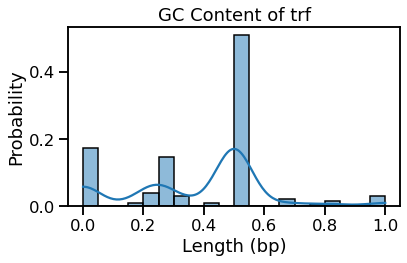

In [15]:
pdf = PdfPages(snakemake.output[0])
fig, ax = plt.subplots()
sns.histplot(x='gc_content', data=df, ax=ax, stat='probability', kde=True)
ax.set_title('GC Content of {}'.format(input_label))
ax.set_xlabel('Length (bp)')
ax.set_ylim(0, 1)
plt.tight_layout()
pdf.savefig(fig)
pdf.close()